<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/VideoProcessing_Blurr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import IPython.display as ipd
from moviepy.editor import *
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2408448/45929032 bytes (5.2%)5578752/45929032 bytes (12.1%)9035776/45929032 bytes (19.7%)12443648/45929032 bytes (27.1%)15949824/45929032 bytes (34.7%)19275776/45929032 bytes (42.0%)22642688/45929032 bytes (49.3%)25878528/45929032 bytes (56.3%)29081600/45929032 bytes (63.3%)32407552/45929032 bytes (70.6%)35577856/45929032 bytes (77.5%)38936576/45929032 bytes (84.8%)

In [ ]:
#Can obtain sample videos on the following site
#https://media.xiph.org/video/derf/

In [ ]:
#Play the video file using moviepy
from moviepy.editor import *
clip=VideoFileClip("/content/bus_cif.y4m")
clip.ipython_display()

 99%|█████████▉| 150/151 [00:00<00:00, 527.19it/s]


In [ ]:
# Read the video and save the frames in a list
new = cv2.VideoCapture('/content/bus_cif.y4m') 

images=[] #Create a list to store all the extracted frames

#Read each frame in the video
while(new.isOpened()):
    ret, frame = new.read()
    if ret == False:
        break
    # saving each frame in images list
    images.append(frame)

new.release()

In [ ]:
#Convert the list to numpy array
images=np.array(images)

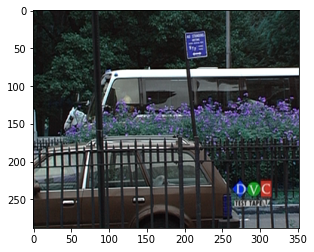

In [ ]:
plt.imshow(images[2]) #show a particular frame in the video

In [ ]:
#Blur the frame number 25 to 50 
img_smooth=images.copy()
for i in range(25,51):
  kernel = np.ones((9,9),np.float32)/25 #Create a smoothing/averaging mask
  img_smooth[i]= cv2.filter2D(images[i],-1,kernel) #Perform blurring


In [ ]:
#Obtain size of each frame
m,n, p= img_smooth[0].shape
print(m,n)

288 352


In [ ]:
img_smooth.shape

(150, 288, 352, 3)

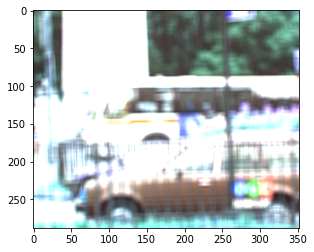

In [ ]:
plt.imshow(img_smooth[30]) #Display one frame to check if the blurring has happened

In [ ]:
#Reconstruct video from the frames

#Reconstruct video from the frames
out = cv2.VideoWriter('/content/blurr_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (n,m)) # for size put n=width first then height (m)
for i in range(len(images)):
    out.write(img_smooth[i])
out.release()

In [ ]:
#Play the video file using moviepy
from moviepy.editor import *
clip=VideoFileClip('/content/blurr_video.avi')
clip.ipython_display()

OSError: ignored